 #                         TRAFFIC SIGN RECOGNITION USING CNN

In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [54]:
test_df = pd.read_csv('C:/Users/hp/Downloads/German Traffic Sign Dataset/Test.csv')
test_df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [55]:
test_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [56]:
train_df = pd.read_csv("C:/Users/hp/Downloads/German Traffic Sign Dataset/Train.csv")
train_df.head()


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [57]:
!pip install visualkeras

In [58]:
import visualkeras
import pandas as pd
train_df=pd.read_csv('C:/Users/hp/Downloads/German Traffic Sign Dataset/Train.csv', usecols=['ClassId','Path','Width','Height']).rename(columns={"ClassId": "label",})

test_df=pd.read_csv('C:/Users/hp/Downloads/German Traffic Sign Dataset/Test.csv',usecols=['ClassId','Path']).rename(columns={"ClassId": "label"})

print("----------TRAIN DATA---------")
print(df.head())
print('\n-----------No. of Classes-----------')
print(df.label.nunique())
print("----------TEST DATA---------")
print(test.head())

print('\n-----------No. of Classes-----------')

print(test.label.nunique())


----------TRAIN DATA---------
   Width  Height  label                            Path
0     27      26     20  Train/20/00020_00000_00000.png
1     28      27     20  Train/20/00020_00000_00001.png
2     29      26     20  Train/20/00020_00000_00002.png
3     28      27     20  Train/20/00020_00000_00003.png
4     28      26     20  Train/20/00020_00000_00004.png

-----------No. of Classes-----------
43
----------TEST DATA---------
   label            Path
0     16  Test/00000.png
1      1  Test/00001.png
2     38  Test/00002.png
3     33  Test/00003.png
4     11  Test/00004.png

-----------No. of Classes-----------
43


In [59]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [60]:
data_dir = 'C:/Users/hp/Downloads/German Traffic Sign Dataset'
train_path = 'C:/Users/hp/Downloads/German Traffic Sign Dataset/Train'
test_path = 'C:/Users/hp/Downloads/German Traffic Sign Dataset/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [61]:
# Number of Classes
import os
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

## Dataset Visualization

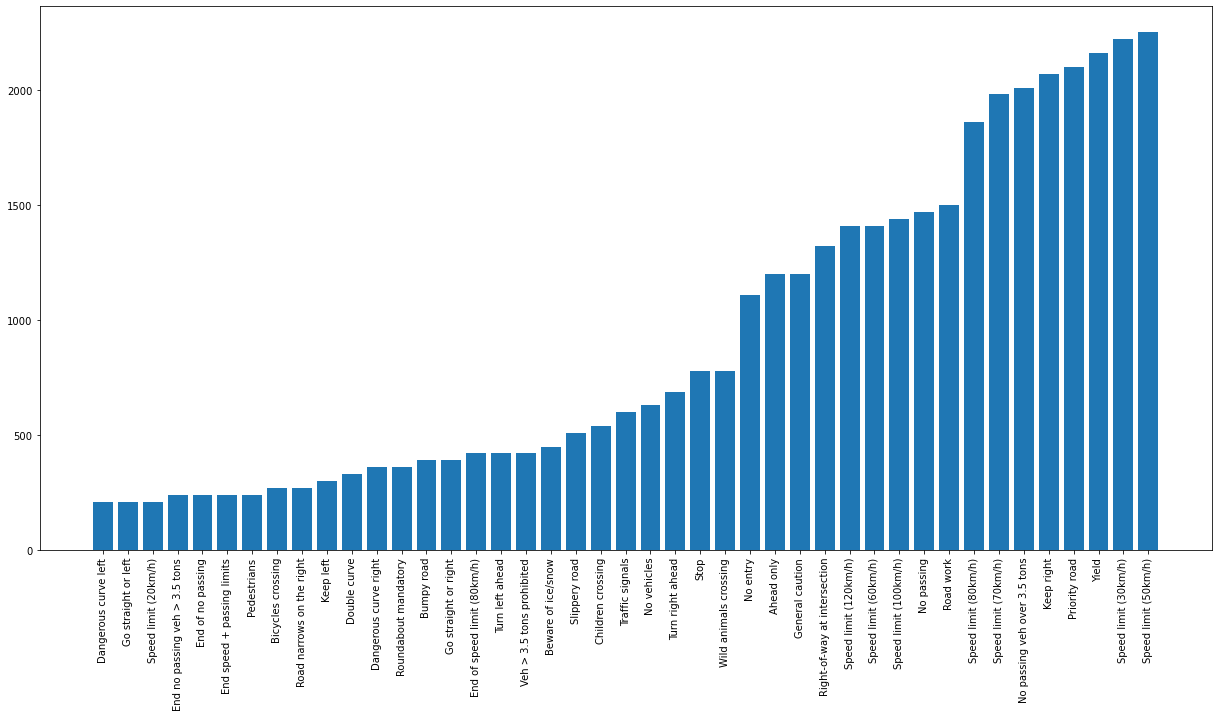

In [62]:
import os
import matplotlib.pyplot as plt
folders = os.listdir(train_img_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()


## Visualizing all the different Signs or classes

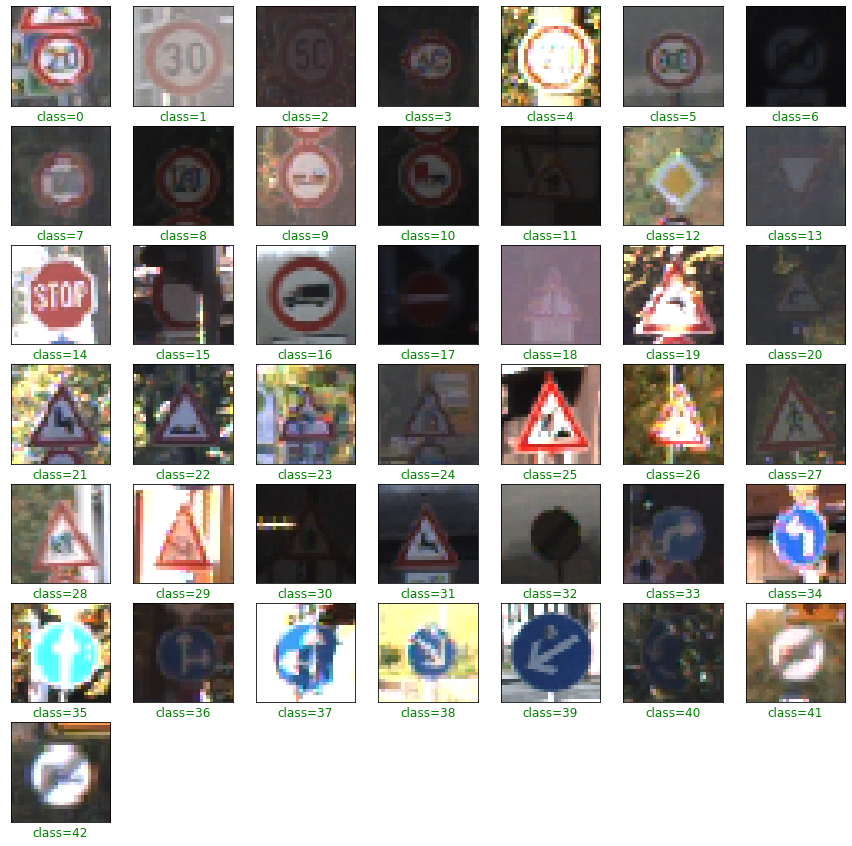

In [63]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(15,15))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.xlabel('class={}'.format(i), color = 'green', fontsize=12)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

##  Visualizing the images of the GTSRB dataset

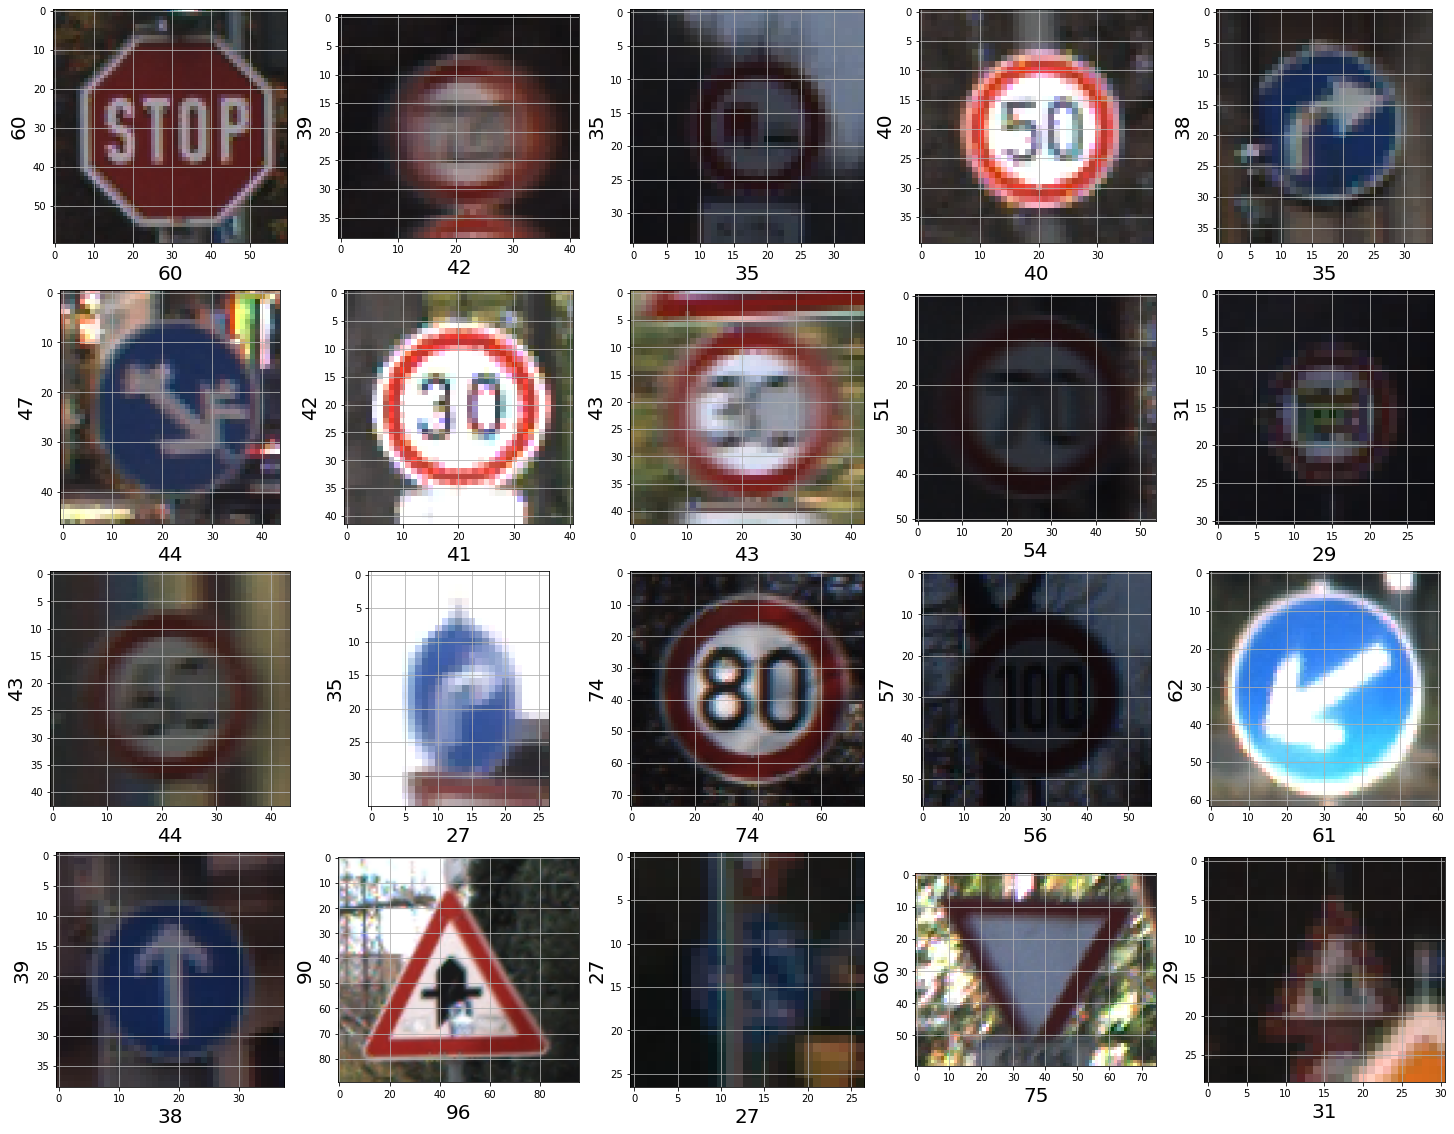

In [64]:
# Visualizing 25 random images from test data
input_path = "C:/Users/hp/Downloads/German Traffic Sign Dataset/"
data_dir = input_path
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values #test folder path

plt.figure(figsize=(25,25))

for i in range(1,21):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
   
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Loading the data and Data Preprocessing

  *  Loading data from Train folder
    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. 

  * `labels` is a list of integer labels, representing the categories for each of the corresponding `images`.

In [67]:
def load_data(data_dir):
    
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels
        

## Categorical  Encoding 
* We need to label encode the classes before feeding it to the model. We’ll do that by using Keras Utils class.
* We need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.

In [75]:
from tensorflow.keras.utils import to_categorical

images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)



[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


## Splitting the dataset into training and test set

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#Preparing the Training data
x_train = x_train.reshape(x_train.shape[0], 30, 30, 3)
x_train = x_train.astype('float32')
x_train /= 255

#preparing the testing data
x_test = x_test.reshape(x_test.shape[0], 30, 30, 3)
x_test = x_test.astype('float32')
x_test /= 255




(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


##  Building the Model

In [71]:
# Importing all essential libraries
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

In [72]:
# Flattening the layer and adding Dense Layer
#The output of previous layers are flattened into a single vector so that they can be input to the next level
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

## Compiling and Fitting the model

In [73]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
# Fitting the model
EPOCHS = 60
history = model.fit(x_train,y_train,validation_data = (x_test, y_test), epochs=EPOCHS,steps_per_epoch=60)
#history = model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs=EPOCHS)

Epoch 1/60
60/60 [==============================] - 30s 485ms/step - loss: 3.4704 - accuracy: 0.1003 - val_loss: 2.5385 - val_accuracy: 0.3628
Epoch 2/60
60/60 [==============================] - 29s 490ms/step - loss: 2.2271 - accuracy: 0.3941 - val_loss: 1.3914 - val_accuracy: 0.6149
Epoch 3/60
60/60 [==============================] - 29s 489ms/step - loss: 1.3434 - accuracy: 0.6021 - val_loss: 0.8856 - val_accuracy: 0.7683
Epoch 4/60
60/60 [==============================] - 32s 540ms/step - loss: 0.9079 - accuracy: 0.7271 - val_loss: 0.6231 - val_accuracy: 0.8293
Epoch 5/60
60/60 [==============================] - 31s 510ms/step - loss: 0.6922 - accuracy: 0.7897 - val_loss: 0.4478 - val_accuracy: 0.8871
Epoch 6/60
60/60 [==============================] - 34s 569ms/step - loss: 0.5361 - accuracy: 0.8378 - val_loss: 0.3629 - val_accuracy: 0.9033
Epoch 7/60
60/60 [==============================] - 35s 578ms/step - loss: 0.4421 - accuracy: 0.8663 - val_loss: 0.2961 - val_accuracy: 0.9236

KeyboardInterrupt: 

## Plotting Training  Accuracy and Loss  & Validation Accuracy and Loss

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))

plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Accuracy Score with Test Data 

In [41]:
from sklearn.metrics import accuracy_score,classification_report


Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict_classes(X_test)
print("EVALUATION ON TESTING DATA")
print(classification_report(test_labels, pred))

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

KeyboardInterrupt: 

In [43]:
from sklearn.metrics import multilabel_confusion_matrix
cm=confusion_matrix(Y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

NameError: name 'pred' is not defined

In [48]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(test_labels,pred)   

array([[[12569,     1],
        [    3,    57]],

       [[11866,    44],
        [   21,   699]],

       [[11844,    36],
        [   44,   706]],

       [[12143,    37],
        [   34,   416]],

       [[11942,    28],
        [   18,   642]],

       [[11941,    59],
        [   47,   583]],

       [[12477,     3],
        [    8,   142]],

       [[12162,    18],
        [   29,   421]],

       [[12140,    40],
        [   25,   425]],

       [[12136,    14],
        [   14,   466]],

       [[11962,     8],
        [   11,   649]],

       [[12151,    59],
        [   38,   382]],

       [[11932,     8],
        [   11,   679]],

       [[11904,     6],
        [    2,   718]],

       [[12357,     3],
        [    1,   269]],

       [[12405,    15],
        [    2,   208]],

       [[12477,     3],
        [    1,   149]],

       [[12270,     0],
        [   14,   346]],

       [[12220,    20],
        [   26,   364]],

       [[12561,     9],
        [    3,    57]],



## Predicting the Model on Test images

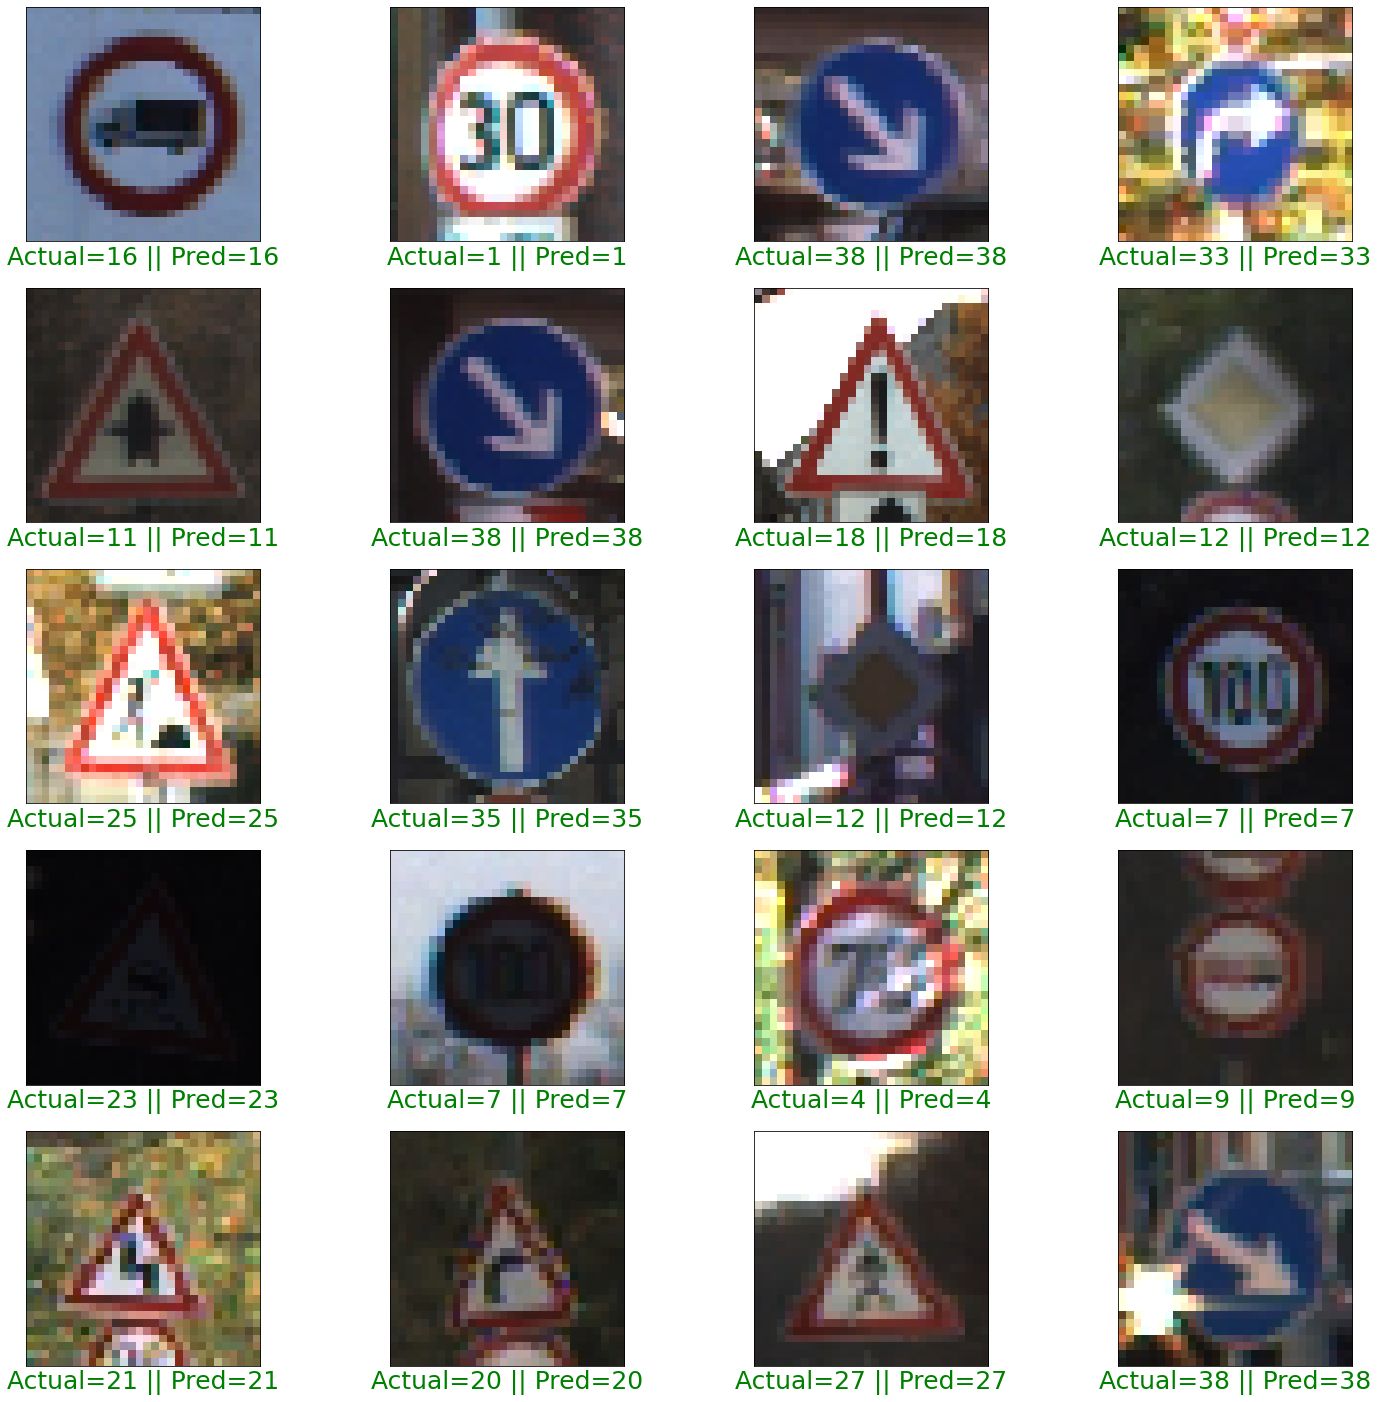

In [49]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index+ i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col, fontsize=25)
    plt.imshow(X_test[start_index + i])
plt.show()

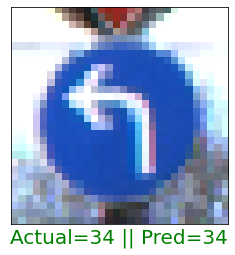

Actual Sign :     Turn left ahead
Predicted Sign :  Turn left ahead


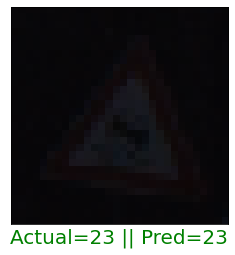

Actual Sign :     Slippery road
Predicted Sign :  Slippery road


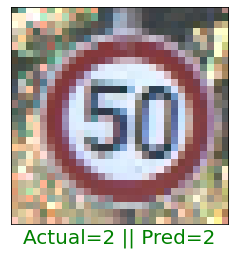

Actual Sign :     Speed limit (50km/h)
Predicted Sign :  Speed limit (50km/h)


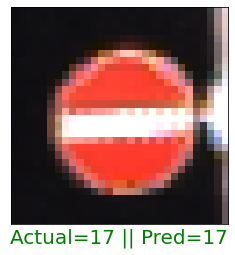

Actual Sign :     No entry
Predicted Sign :  No entry


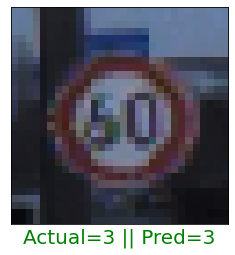

Actual Sign :     Speed limit (60km/h)
Predicted Sign :  Speed limit (60km/h)


In [50]:
# Predicting the model on the test images 
start_index = 32
for i in range(5):
    plt.figure(figsize = (4, 4))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index+ i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col, fontsize=20)
    
    plt.imshow(X_test[start_index + i])
   
    plt.show()
    print("Actual Sign :    ", classes[actual])
    print("Predicted Sign : ", classes[prediction])

## Saving the model

In [51]:
model.save("C:/Users/hp/Downloads/German Traffic Sign Dataset/training/TSR.h5")

## Loading the model

In [52]:
from keras.models import load_model
model1 = load_model('C:/Users/hp/Downloads/German Traffic Sign Dataset/training/TSR.h5')

In [53]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model1.predict_classes(X_test)
    return image,Y_pred

## Labelling the Class

In [54]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Using the Saved model to predict the classes or Sign

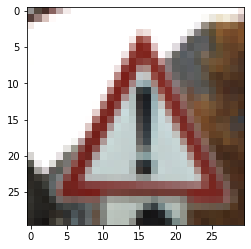

Predicted Class:  18
Predicted traffic sign is:  General caution


In [55]:
plot,prediction = test_on_img(r'C:\Users\hp\Downloads\German Traffic Sign Dataset\Test\00006.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 

plt.imshow(plot)
plt.show()
print("Predicted Class: ",a)      
print("Predicted traffic sign is: ", classes[a])
